# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Easily-creating-MAB-problems" data-toc-modified-id="Easily-creating-MAB-problems-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Easily creating MAB problems</a></div><div class="lev2 toc-item"><a href="#Constant-arms" data-toc-modified-id="Constant-arms-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Constant arms</a></div><div class="lev2 toc-item"><a href="#Bernoulli-arms" data-toc-modified-id="Bernoulli-arms-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Bernoulli arms</a></div><div class="lev2 toc-item"><a href="#Gaussian-arms" data-toc-modified-id="Gaussian-arms-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Gaussian arms</a></div><div class="lev3 toc-item"><a href="#Wrong-means-for-Gaussian-arms-?" data-toc-modified-id="Wrong-means-for-Gaussian-arms-?-131"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Wrong means for Gaussian arms ?</a></div><div class="lev3 toc-item"><a href="#Closed-form-formula" data-toc-modified-id="Closed-form-formula-132"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Closed form formula</a></div><div class="lev3 toc-item"><a href="#With-a-larger-variance-?" data-toc-modified-id="With-a-larger-variance-?-133"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>With a larger variance ?</a></div><div class="lev2 toc-item"><a href="#Exponential-arms" data-toc-modified-id="Exponential-arms-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Exponential arms</a></div><div class="lev2 toc-item"><a href="#Uniform-arms" data-toc-modified-id="Uniform-arms-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Uniform arms</a></div><div class="lev2 toc-item"><a href="#Arms-with-rewards-outside-of-$[0,-1]$" data-toc-modified-id="Arms-with-rewards-outside-of-$[0,-1]$-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Arms with rewards outside of <span class="MathJax_Preview" style="color: inherit;"><span class="MJXp-math" id="MJXp-Span-243"><span class="MJXp-mo" id="MJXp-Span-244" style="margin-left: 0em; margin-right: 0em;">[</span><span class="MJXp-mn" id="MJXp-Span-245">0</span><span class="MJXp-mo" id="MJXp-Span-246" style="margin-left: 0em; margin-right: 0.222em;">,</span><span class="MJXp-mn" id="MJXp-Span-247">1</span><span class="MJXp-mo" id="MJXp-Span-248" style="margin-left: 0em; margin-right: 0em;">]</span></span></span><script type="math/tex" id="MathJax-Element-30">[0, 1]</script></a></div><div class="lev2 toc-item"><a href="#Gamma-arms" data-toc-modified-id="Gamma-arms-17"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Gamma arms</a></div><div class="lev2 toc-item"><a href="#Non-truncated-Gaussian-and-Gamma-arms" data-toc-modified-id="Non-truncated-Gaussian-and-Gamma-arms-18"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Non-truncated Gaussian and Gamma arms</a></div><div class="lev2 toc-item"><a href="#Conclusion" data-toc-modified-id="Conclusion-19"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Conclusion</a></div>

---
# Easily creating MAB problems
First, be sure to be in the main folder, or to have installed [`SMPyBandits`](https://github.com/SMPyBandits/SMPyBandits), and import `MAB` from `Environment` package:

In [1]:
!pip install SMPyBandits watermark
%load_ext watermark
%watermark -v -m -p SMPyBandits -a "Lilian Besson"

Info: Using the Jupyter notebook version of the tqdm() decorator, tqdm_notebook() ...
Lilian Besson 

CPython 3.6.6
IPython 7.1.1

SMPyBandits 0.9.4

compiler   : GCC 8.0.1 20180414 (experimental) [trunk revision 259383
system     : Linux
release    : 4.15.0-38-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit


In [2]:
from SMPyBandits.Environment import MAB

And also, import all the types of arms.

In [3]:
from SMPyBandits.Arms import *
# Check it exists:
Constant, Bernoulli, Gaussian, Exponential, ExponentialFromMean, Poisson, UniformArm, Gamma, GammaFromMean

(SMPyBandits.Arms.Constant.Constant,
 SMPyBandits.Arms.Bernoulli.Bernoulli,
 SMPyBandits.Arms.Gaussian.Gaussian,
 SMPyBandits.Arms.Exponential.Exponential,
 SMPyBandits.Arms.Exponential.ExponentialFromMean,
 SMPyBandits.Arms.Poisson.Poisson,
 SMPyBandits.Arms.UniformArm.UniformArm,
 SMPyBandits.Arms.Gamma.Gamma,
 SMPyBandits.Arms.Gamma.GammaFromMean)

In [4]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12.4, 7)

## Constant arms

This is the simpler example of arms : rewards are constant, and not randomly drawn from a distribution.
Let consider an example with $K = 3$ arms.

In [5]:
M_C = MAB([Constant(mu) for mu in [0.1, 0.5, 0.9]])



Creating a new MAB problem ...
  Taking arms of this MAB problem from a list of arms 'configuration' = [Constant(0.1), Constant(0.5), Constant(0.9)] ...
 - with 'arms' = [Constant(0.1), Constant(0.5), Constant(0.9)]
 - with 'means' = [0.1 0.5 0.9]
 - with 'nbArms' = 3
 - with 'maxArm' = 0.9
 - with 'minArm' = 0.1

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 2 ... 
 - a Optimal Arm Identification factor H_OI(mu) = 26.67% ...
 - with 'arms' represented as: $[Constant(0.1), Constant(0.5), Constant(0.9)^*]$


The `plotHistogram()` method draws samples from each arm, and plot a histogram of their repartition.
For constant arms, no need to take a lot of samples as they are constant.

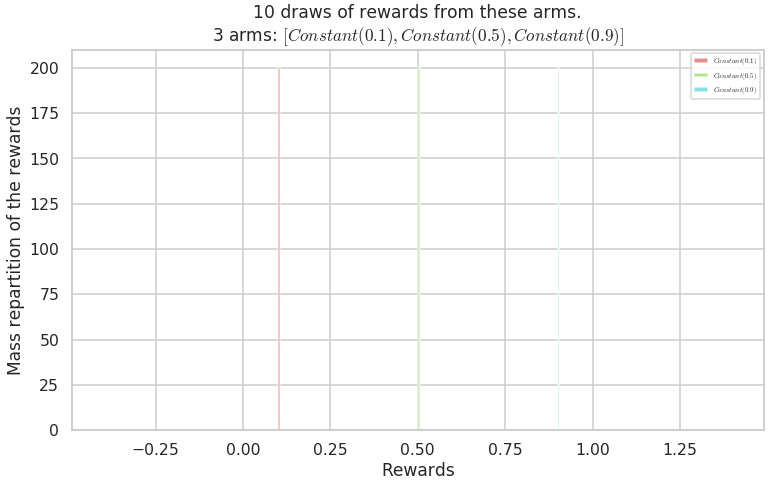

In [6]:
_ = M_C.plotHistogram(10)

## Bernoulli arms
Then it's easy to create a Multi-Armed Bandit problem, instance of `MAB` class, either from a list of `Arm` objects:

In [7]:
M_B = MAB([Bernoulli(mu) for mu in [0.1, 0.5, 0.9]])



Creating a new MAB problem ...
  Taking arms of this MAB problem from a list of arms 'configuration' = [B(0.1), B(0.5), B(0.9)] ...
 - with 'arms' = [B(0.1), B(0.5), B(0.9)]
 - with 'means' = [0.1 0.5 0.9]
 - with 'nbArms' = 3
 - with 'maxArm' = 0.9
 - with 'minArm' = 0.1

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 1.24 ... 
 - a Optimal Arm Identification factor H_OI(mu) = 26.67% ...
 - with 'arms' represented as: $[B(0.1), B(0.5), B(0.9)^*]$


Or from a dictionary, with keys `"arm_type"` and `"params"`:

In [8]:
M_B = MAB({
    "arm_type": Bernoulli,
    "params": [0.1, 0.5, 0.9]
})



Creating a new MAB problem ...
  Reading arms of this MAB problem from a dictionnary 'configuration' = {'arm_type': <class 'SMPyBandits.Arms.Bernoulli.Bernoulli'>, 'params': [0.1, 0.5, 0.9]} ...
 - with 'arm_type' = <class 'SMPyBandits.Arms.Bernoulli.Bernoulli'>
 - with 'params' = [0.1, 0.5, 0.9]
 - with 'arms' = [B(0.1), B(0.5), B(0.9)]
 - with 'means' = [0.1 0.5 0.9]
 - with 'nbArms' = 3
 - with 'maxArm' = 0.9
 - with 'minArm' = 0.1

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 1.24 ... 
 - a Optimal Arm Identification factor H_OI(mu) = 26.67% ...
 - with 'arms' represented as: $[B(0.1), B(0.5), B(0.9)^*]$


The `plotHistogram()` method draws a lot of samples from each arm, and plot a histogram of their repartition:

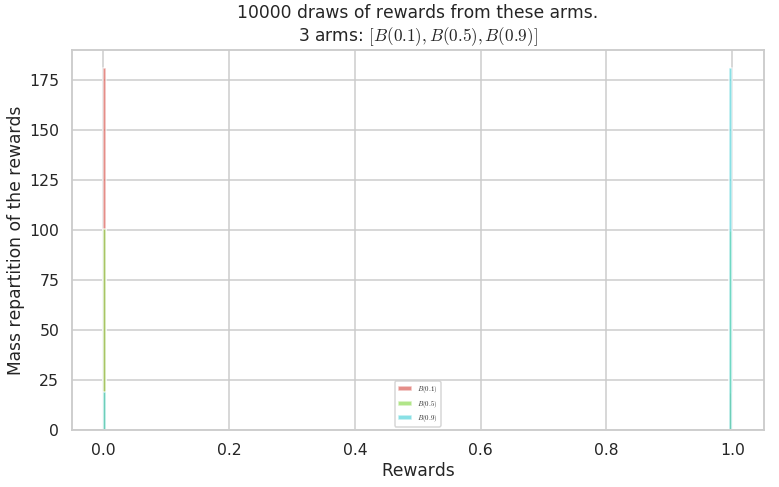

In [9]:
_ = M_B.plotHistogram()

## Gaussian arms
And with Gaussian arms, with a small variance of $\sigma^2 = 0.05$, for rewards truncated into $[0, 1]$:

In [10]:
M_G = MAB([Gaussian(mu, sigma=0.05) for mu in [0.1, 0.5, 0.9]])



Creating a new MAB problem ...
  Taking arms of this MAB problem from a list of arms 'configuration' = [N(0.1, 0.05), N(0.5, 0.05), N(0.9, 0.05)] ...
 - with 'arms' = [N(0.1, 0.05), N(0.5, 0.05), N(0.9, 0.05)]
 - with 'means' = [0.1 0.5 0.9]
 - with 'nbArms' = 3
 - with 'maxArm' = 0.9
 - with 'minArm' = 0.1

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 0.375 ... 
 - a Optimal Arm Identification factor H_OI(mu) = 26.67% ...
 - with 'arms' represented as: $[N(0.1), N(0.5), N(0.9)^*], \sigma^2=0.05$


The histogram clearly shows that low-variance Gaussian arms are easy to separate:

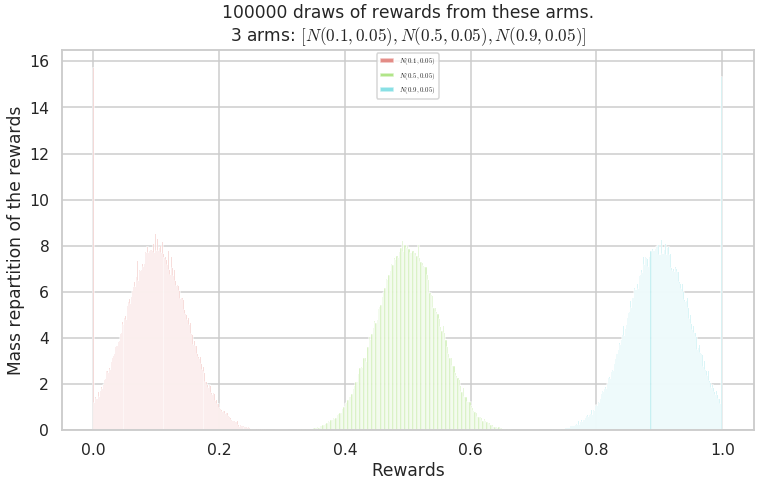

In [11]:
_ = M_G.plotHistogram(100000)

### Wrong means for Gaussian arms ?
The truncation seems to change the means.

> For instance, the first arm (in <span style="color:red;">red</span>) has a small mass on the special value $0$, so it probably reduces its mean.

Let's estimate it empirically, and then check with the closed form solution.

In [12]:
arm = Gaussian(0.1, sigma=0.05)

In [13]:
mean = arm.mean
estimated_mean = np.mean(arm.draw_nparray((10000000,)))

In [14]:
mean, estimated_mean

(0.1, 0.10042691516597835)

In [15]:
def relative_error(x, y):
    return abs(x - y) / x

relative_error(mean, estimated_mean)

0.004269151659783421

$\implies$ That's a relative difference of $0.4\%$, really negligible!

And for other values for $(\mu, \sigma)$:

In [16]:
arm = Gaussian(0.7, sigma=3)

In [17]:
mean = arm.mean
estimated_mean = np.mean(arm.draw_nparray((10000000,)))

In [18]:
mean, estimated_mean

(0.7, 0.5266068636711595)

In [19]:
relative_error(mean, estimated_mean)

0.2477044804697721

$\implies$ That's a relative difference of $25\%$!

> Clearly, this effect cannot be neglected!

### Closed form formula

Apparently, the closed form formula for the mean of a Gaussian arm $\mathcal{N}(\mu, \sigma)$, **truncated to $[a,b]$** is :
$$\mathbb{E} (X\mid a<X<b)=\mu +\sigma {\frac {\phi ({\frac {a-\mu }{\sigma }})-\phi ({\frac {b-\mu }{\sigma }})}{\Phi ({\frac {b-\mu }{\sigma }})-\Phi ({\frac {a-\mu }{\sigma }})}}\!=\mu +\sigma {\frac {\phi (\alpha )-\phi (\beta )}{\Phi (\beta )-\Phi (\alpha )}}.$$

Let's compute that.

In [20]:
import numpy as np
from scipy.special import erf

The fonction
$$\phi(x) := \frac{1}{\sqrt{2 \pi}} \exp\left(- \frac{1}{2} x^2 \right).$$

In [21]:
def phi(xi):
    r"""The :math:`\phi(\xi)` function, defined by:

    .. math:: \phi(\xi) := \frac{1}{\sqrt{2 \pi}} \exp\left(- \frac12 \xi^2 \right)

    It is the probability density function of the standard normal distribution, see https://en.wikipedia.org/wiki/Standard_normal_distribution.
    """
    return np.exp(- 0.5 * xi**2) / np.sqrt(2. * np.pi)

The fonction
$$\Phi(x) := \frac{1}{2} \left(1 + \mathrm{erf}\left( \frac{x}{\sqrt{2}} \right) \right).$$

In [22]:
def Phi(x):
    r"""The :math:`\Phi(x)` function, defined by:

    .. math:: \Phi(x) := \frac{1}{2} \left(1 + \mathrm{erf}\left( \frac{x}{\sqrt{2}} \right) \right).

    It is the probability density function of the standard normal distribution, see https://en.wikipedia.org/wiki/Cumulative_distribution_function
    """
    return (1. + erf(x / np.sqrt(2.))) / 2.

In [23]:
mu, sigma, mini, maxi = arm.mu, arm.sigma, arm.min, arm.max
mu, sigma, mini, maxi

(0.7, 3, 0, 1)

In [24]:
other_mean = mu + sigma * (phi(mini) - phi(maxi)) / (Phi(maxi) - Phi(mini))

In [25]:
mean, estimated_mean, other_mean

(0.7, 0.5266068636711595, 2.0795866878592797)

Well, apparently, the [theoretical formula](https://en.wikipedia.org/wiki/Truncated_normal_distribution#Moments) is false for this case.
It is not even bounded in $[0, 1]$!

Let's forget about this possible issue, and consider that the mean $\mu$ of a Gaussian arm $\mathcal{N}(\mu, \sigma)$ truncated to $[0,1]$ is indeed $\mu$.

### With a larger variance ?
But if the variance is larger, it can be very hard to differentiate between arms, and so MAB learning will be harder.
With a big variance of $\sigma^2 = 0.5$, for rewards truncated into $[0, 1]$:



Creating a new MAB problem ...
  Taking arms of this MAB problem from a list of arms 'configuration' = [N(0.1, 0.1), N(0.5, 0.1), N(0.9, 0.1)] ...
 - with 'arms' = [N(0.1, 0.1), N(0.5, 0.1), N(0.9, 0.1)]
 - with 'means' = [0.1 0.5 0.9]
 - with 'nbArms' = 3
 - with 'maxArm' = 0.9
 - with 'minArm' = 0.1

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 0.75 ... 
 - a Optimal Arm Identification factor H_OI(mu) = 26.67% ...
 - with 'arms' represented as: $[N(0.1), N(0.5), N(0.9)^*], \sigma^2=0.1$


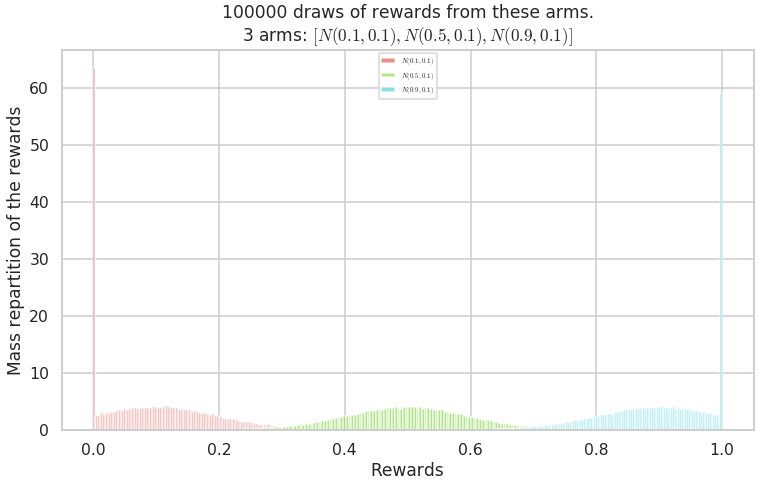

In [26]:
M_G = MAB([Gaussian(mu, sigma=0.10) for mu in [0.1, 0.5, 0.9]])
_ = M_G.plotHistogram(100000)

We see that due to the truncation, if mean of the Gaussian is too close to $0$ or $1$, then actual mean rewards is pushed to $0$ or $1$ (here the blue arm clearly has a mean higher than $0.9$).

And for larger variances, it is even stronger:



Creating a new MAB problem ...
  Taking arms of this MAB problem from a list of arms 'configuration' = [N(0.1, 0.25), N(0.5, 0.25), N(0.9, 0.25)] ...
 - with 'arms' = [N(0.1, 0.25), N(0.5, 0.25), N(0.9, 0.25)]
 - with 'means' = [0.1 0.5 0.9]
 - with 'nbArms' = 3
 - with 'maxArm' = 0.9
 - with 'minArm' = 0.1

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 1.87 ... 
 - a Optimal Arm Identification factor H_OI(mu) = 26.67% ...
 - with 'arms' represented as: $[N(0.1), N(0.5), N(0.9)^*], \sigma^2=0.25$


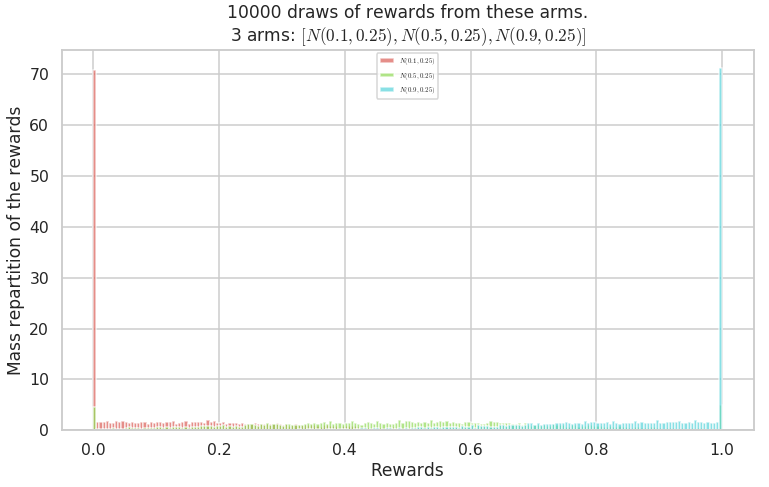

In [27]:
M_G = MAB([Gaussian(mu, sigma=0.25) for mu in [0.1, 0.5, 0.9]])
_ = M_G.plotHistogram()

## Exponential arms
We can do the same with (truncated) Exponential arms, and as a convenience I prefer to work with `ExponentialFromMean`, to use the mean and not the $\lambda$ parameter to create the arm.

In [28]:
M_E = MAB({ "arm_type": ExponentialFromMean, "params": [0.1, 0.5, 0.9]})



Creating a new MAB problem ...
  Reading arms of this MAB problem from a dictionnary 'configuration' = {'arm_type': <class 'SMPyBandits.Arms.Exponential.ExponentialFromMean'>, 'params': [0.1, 0.5, 0.9]} ...
 - with 'arm_type' = <class 'SMPyBandits.Arms.Exponential.ExponentialFromMean'>
 - with 'params' = [0.1, 0.5, 0.9]
 - with 'arms' = [\mathrm{Exp}(10, 1), \mathrm{Exp}(1.59, 1), \mathrm{Exp}(0.215, 1)]
 - with 'means' = [0.1 0.5 0.9]
 - with 'nbArms' = 3
 - with 'maxArm' = 0.9000000032329611
 - with 'minArm' = 0.10000000005466392

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 3.4 ... 
 - a Optimal Arm Identification factor H_OI(mu) = 26.67% ...
 - with 'arms' represented as: $[\mathrm{Exp}(10, 1), \mathrm{Exp}(1.59, 1), \mathrm{Exp}(0.215, 1)^*]$


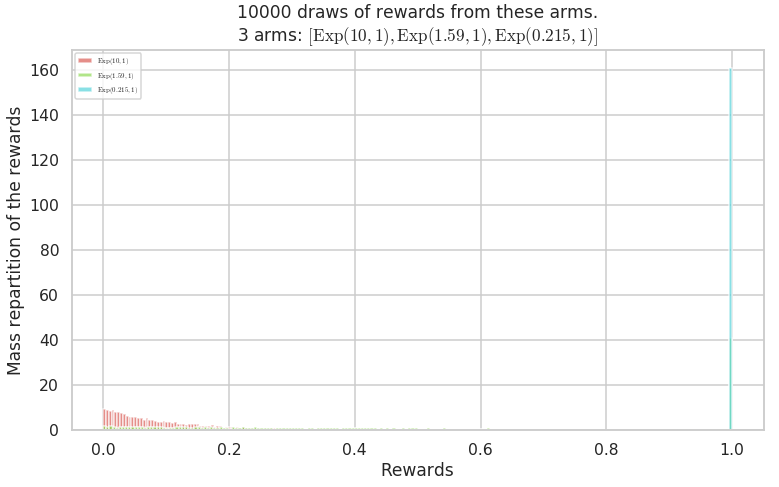

In [29]:
_ = M_E.plotHistogram()

## Uniform arms
Arms with rewards uniform in $[0,1]$, are continuous versions of Bernoulli$(0.5)$.
They can also be uniform in other intervals.

In [30]:
UniformArm(0, 1).lower_amplitude
UniformArm(0, 0.1).lower_amplitude
UniformArm(0.4, 0.5).lower_amplitude
UniformArm(0.8, 0.9).lower_amplitude

(0, 1)

(0, 0.1)

(0.4, 0.09999999999999998)

(0.8, 0.09999999999999998)

In [31]:
M_U = MAB([UniformArm(0, 1), UniformArm(0, 0.1), UniformArm(0.4, 0.5), UniformArm(0.8, 0.9)])



Creating a new MAB problem ...
  Taking arms of this MAB problem from a list of arms 'configuration' = [U(0, 1), U(0, 0.1), U(0.4, 0.5), U(0.8, 0.9)] ...
 - with 'arms' = [U(0, 1), U(0, 0.1), U(0.4, 0.5), U(0.8, 0.9)]
 - with 'means' = [0.5  0.05 0.45 0.85]
 - with 'nbArms' = 4
 - with 'maxArm' = 0.8500000000000001
 - with 'minArm' = 0.05

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 2.47 ... 
 - a Optimal Arm Identification factor H_OI(mu) = 36.25% ...
 - with 'arms' represented as: $[U(0, 1), U(0, 0.1), U(0.4, 0.5), U(0.8, 0.9)^*]$


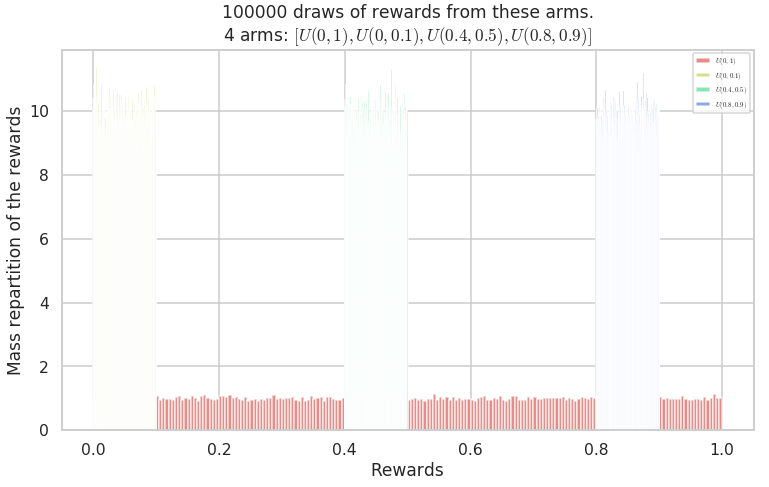

In [32]:
_ = M_U.plotHistogram(100000)

----
## Arms with rewards outside of $[0, 1]$

Of course, everything work similarly if rewards are not in $[0, 1]$ but in any interval $[a, b]$.

Note that all my algorithms assume $a = \text{lower} = 0$ and $b = 1$ (and use 
$\text{amplitude} = b - a$ instead of $b$).
They just need to be specified if we stop using the default choice $[0, 1]$.

For example, Gaussian arms can be truncated into $[-10, 10]$ instead of $[0, 1]$.
Let define some Gaussian arms, with means $-5, 0, 5$ and a variance of $\sigma^2 = 2$.

In [33]:
M_G = MAB([Gaussian(mu, sigma=2, mini=-10, maxi=10) for mu in [-5, 0, 5]])



Creating a new MAB problem ...
  Taking arms of this MAB problem from a list of arms 'configuration' = [N(-5, 2), N(0, 2), N(5, 2)] ...
 - with 'arms' = [N(-5, 2), N(0, 2), N(5, 2)]
 - with 'means' = [-5  0  5]
 - with 'nbArms' = 3
 - with 'maxArm' = 5
 - with 'minArm' = -5

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 1.2 ... 
 - a Optimal Arm Identification factor H_OI(mu) = 16.67% ...
 - with 'arms' represented as: $[N(-5), N(0), N(5)^*], \sigma^2=2$


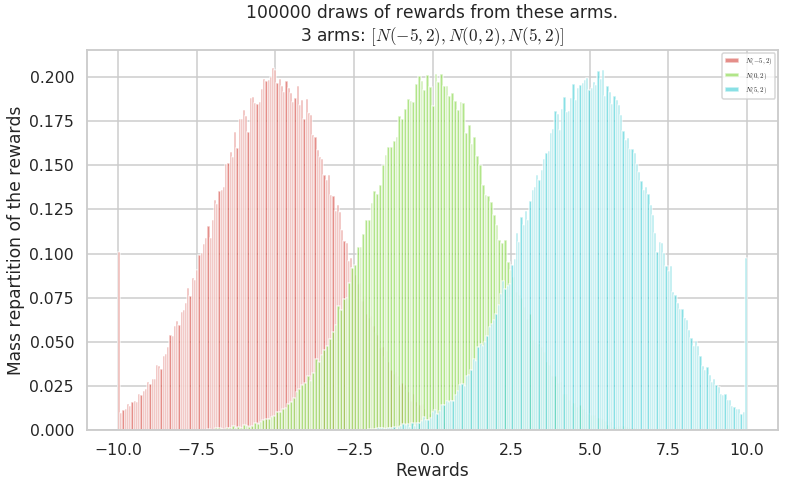

In [34]:
_ = M_G.plotHistogram(100000)

In [35]:
M_G = MAB([Gaussian(mu, sigma=0.1, mini=-10, maxi=10) for mu in [-5, 0, 5]])



Creating a new MAB problem ...
  Taking arms of this MAB problem from a list of arms 'configuration' = [N(-5, 0.1), N(0, 0.1), N(5, 0.1)] ...
 - with 'arms' = [N(-5, 0.1), N(0, 0.1), N(5, 0.1)]
 - with 'means' = [-5  0  5]
 - with 'nbArms' = 3
 - with 'maxArm' = 5
 - with 'minArm' = -5

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 0.06 ... 
 - a Optimal Arm Identification factor H_OI(mu) = 16.67% ...
 - with 'arms' represented as: $[N(-5), N(0), N(5)^*], \sigma^2=0.1$


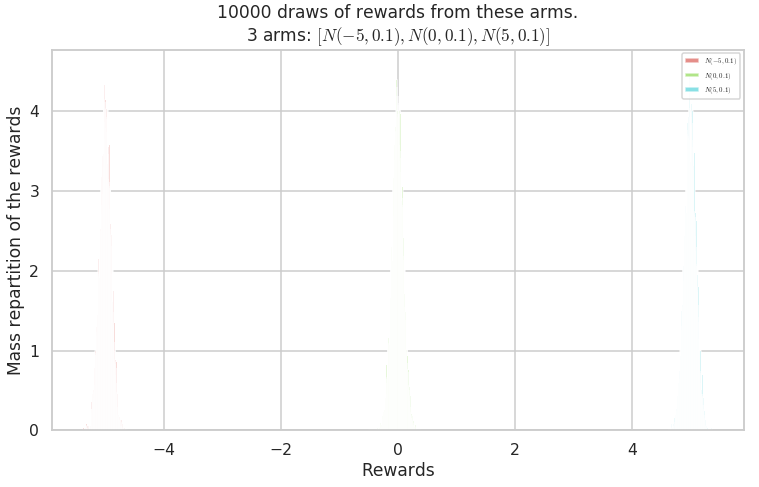

In [36]:
_ = M_G.plotHistogram()

## Gamma arms

We can do the same with (truncated) Gamma arms, and as a convenience I prefer to work with `GammaFromMean`, to use the mean and not the $k$ shape parameter to create the arm.
The scale $\theta$ is fixed to $1$ by default, and here the rewards will be in $[0, 10]$.

In [37]:
M_Gamma = MAB([GammaFromMean(shape, scale=1, mini=0, maxi=10) for shape in [1, 2, 3, 4, 5]])



Creating a new MAB problem ...
  Taking arms of this MAB problem from a list of arms 'configuration' = [\Gamma(1, 1), \Gamma(2, 1), \Gamma(3, 1), \Gamma(4, 1), \Gamma(5, 1)] ...
 - with 'arms' = [\Gamma(1, 1), \Gamma(2, 1), \Gamma(3, 1), \Gamma(4, 1), \Gamma(5, 1)]
 - with 'means' = [1. 2. 3. 4. 5.]
 - with 'nbArms' = 5
 - with 'maxArm' = 5.0
 - with 'minArm' = 1.0

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 75.7 ... 
 - a Optimal Arm Identification factor H_OI(mu) = 60.00% ...
 - with 'arms' represented as: $[\Gamma(1, 1), \Gamma(2, 1), \Gamma(3, 1), \Gamma(4, 1), \Gamma(5, 1)^*]$


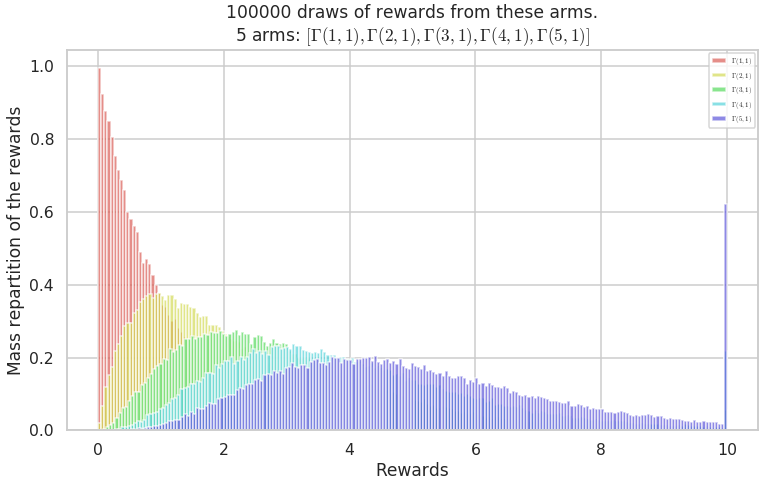

In [38]:
_ = M_Gamma.plotHistogram(100000)

As for Gaussian arms, the truncation is strongly changing the means of the arm rewards.
Here the arm with mean parameter $5$ has an empirical mean close  to $10$ due to truncation.

## Non-truncated Gaussian and Gamma arms

Let try with non-truncated rewards.

In [39]:
M_G = MAB([Gaussian(mu, sigma=3, mini=float('-inf'), maxi=float('+inf')) for mu in [-10, 0, 10]])



Creating a new MAB problem ...
  Taking arms of this MAB problem from a list of arms 'configuration' = [N(-10, 3), N(0, 3), N(10, 3)] ...
 - with 'arms' = [N(-10, 3), N(0, 3), N(10, 3)]
 - with 'means' = [-10   0  10]
 - with 'nbArms' = 3
 - with 'maxArm' = 10
 - with 'minArm' = -10

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 0.9 ... 
 - a Optimal Arm Identification factor H_OI(mu) = 66.67% ...
 - with 'arms' represented as: $[N(-10), N(0), N(10)^*], \sigma^2=3$


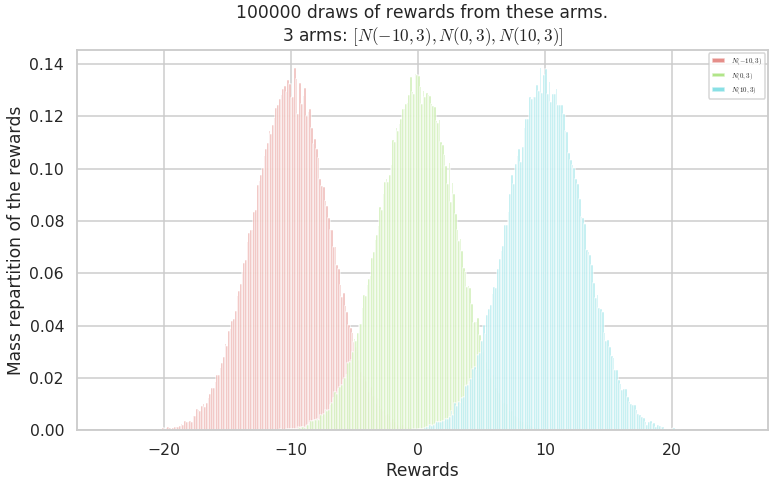

In [40]:
_ = M_G.plotHistogram(100000)

And with non-truncated Gamma arms ?



Creating a new MAB problem ...
  Taking arms of this MAB problem from a list of arms 'configuration' = [\Gamma(1, 1), \Gamma(2, 1), \Gamma(3, 1), \Gamma(4, 1), \Gamma(5, 1)] ...
 - with 'arms' = [\Gamma(1, 1), \Gamma(2, 1), \Gamma(3, 1), \Gamma(4, 1), \Gamma(5, 1)]
 - with 'means' = [1. 2. 3. 4. 5.]
 - with 'nbArms' = 5
 - with 'maxArm' = 5.0
 - with 'minArm' = 1.0

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 75.7 ... 
 - a Optimal Arm Identification factor H_OI(mu) = 80.00% ...
 - with 'arms' represented as: $[\Gamma(1, 1), \Gamma(2, 1), \Gamma(3, 1), \Gamma(4, 1), \Gamma(5, 1)^*]$


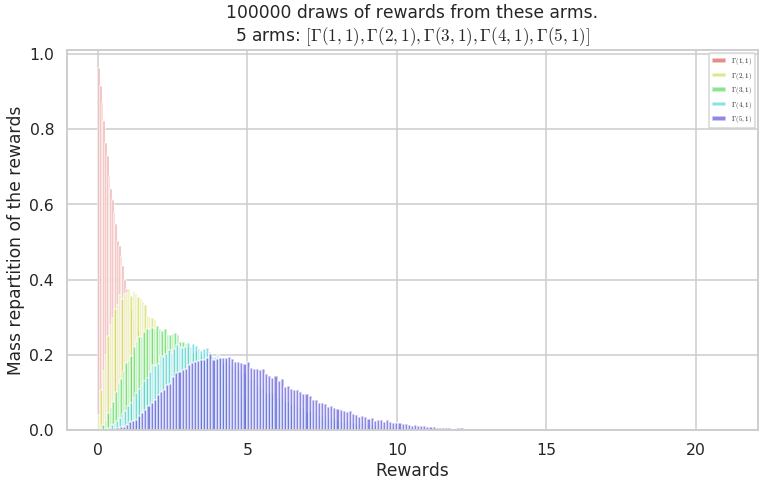

In [41]:
M_Gamma = MAB([GammaFromMean(shape, scale=1, mini=float('-inf'), maxi=float('+inf')) for shape in [1, 2, 3, 4, 5]])
_ = M_Gamma.plotHistogram(100000)



Creating a new MAB problem ...
  Taking arms of this MAB problem from a list of arms 'configuration' = [\Gamma(10, 1), \Gamma(20, 1), \Gamma(30, 1), \Gamma(40, 1), \Gamma(50, 1)] ...
 - with 'arms' = [\Gamma(10, 1), \Gamma(20, 1), \Gamma(30, 1), \Gamma(40, 1), \Gamma(50, 1)]
 - with 'means' = [10. 20. 30. 40. 50.]
 - with 'nbArms' = 5
 - with 'maxArm' = 50.0
 - with 'minArm' = 10.0

This MAB problem has: 
 - a [Lai & Robbins] complexity constant C(mu) = 757 ... 
 - a Optimal Arm Identification factor H_OI(mu) = 80.00% ...
 - with 'arms' represented as: $[\Gamma(10, 1), \Gamma(20, 1), \Gamma(30, 1), \Gamma(40, 1), \Gamma(50, 1)^*]$


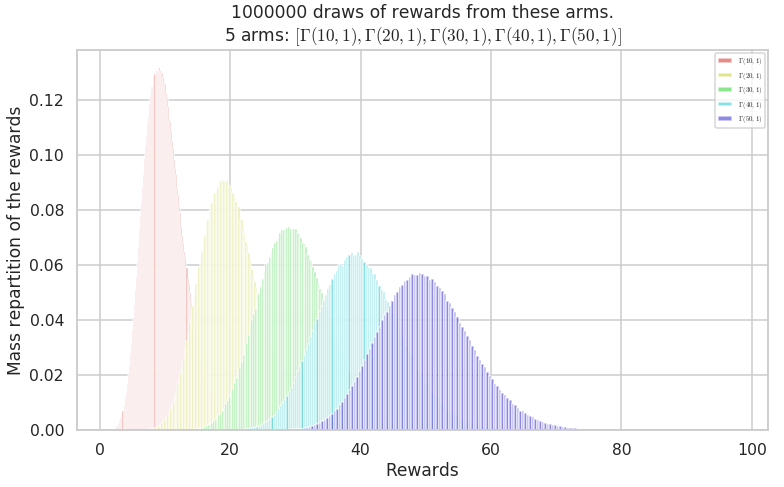

In [42]:
M_Gamma = MAB([GammaFromMean(shape, scale=1, mini=float('-inf'), maxi=float('+inf')) for shape in [10, 20, 30, 40, 50]])
_ = M_Gamma.plotHistogram(1000000)

----
## Conclusion

This small notebook demonstrated how to define arms and Multi-Armed Bandit problems in my framework, [SMPyBandits](https://github.com/SMPyBandits/SMPyBandits).